In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../data')
from dataLoader import loadDataframe

Import datas

In [2]:
df_movies = loadDataframe('movies')

df_characters = loadDataframe('characters')

df_clusters = loadDataframe('clusters')

df_summaries = loadDataframe('summaries')

c:\Users\arnau\OneDrive\Documents\Scolarité EPFL\ADA\ada-2024-project-teamcsx24\src\analysisResearch\../data\dataLoader.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_convert] = df[columns_to_convert].applymap(eval)


# Data exploration

### Genres exploration

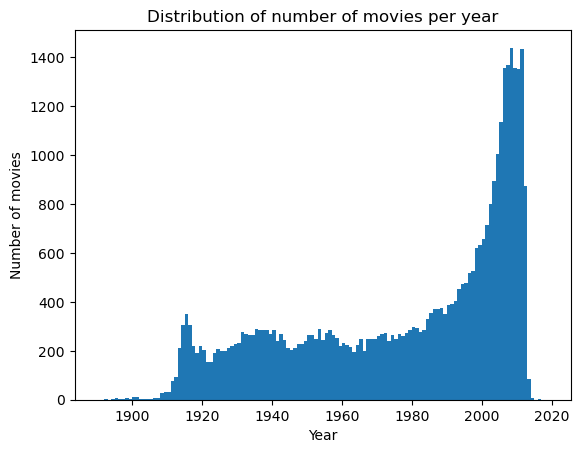

In [5]:
# Distribution of number of movies per year
plt.hist(df_movies['release_date'].dt.year, bins=range(1890, 2020, 1))
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Distribution of number of movies per year')
plt.show()

In [6]:
df_genres_countries_exploded = df_movies.explode('genres').explode('countries')
df_genres_countries_exploded.head(3)

,wiki_id,freebase_id,name,release_date,revenue,runtime,languages,countries,genres,countries_freebase_id,languages_freebase_id,genres_freebase_id
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],United States of America,Thriller,['/m/09c7w0'],['/m/02h40lc'],"['/m/01jfsb', '/m/06n90', '/m/03npn', '/m/03k9..."
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],United States of America,Science Fiction,['/m/09c7w0'],['/m/02h40lc'],"['/m/01jfsb', '/m/06n90', '/m/03npn', '/m/03k9..."
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],United States of America,Horror,['/m/09c7w0'],['/m/02h40lc'],"['/m/01jfsb', '/m/06n90', '/m/03npn', '/m/03k9..."


In [26]:
import plotly.express as px

In [38]:
country = 'Germany'  # Specify the country
time_interval = 10
selected_genres = ['Action', 'Drama', 'Comedy', 'Thriller','World cinema', 'Horror'] 
df_country = df_genres_countries_exploded[df_genres_countries_exploded['countries'] == country]

# Calculate the number of films in each genre by year and by period
df_country['year'] = df_country['release_date'].dt.year
genre_by_year = df_country.groupby(['year', 'genres']).size().unstack().fillna(0)
genre_by_year['period'] = (genre_by_year.index // time_interval) * time_interval
genre_by_period = genre_by_year.groupby('period').sum()

# Select the genres of interest and calculate the proportion of each genre
genre_by_period_selected = genre_by_period[selected_genres]
genre_by_period_selected_proportion = genre_by_period_selected.div(genre_by_period_selected.sum(axis=1), axis=0)


# Prepare the data for Plotly
df_plot = genre_by_period_selected_proportion.reset_index().melt(id_vars='period', var_name='Genre', value_name='Proportion')

# Create the interactive stacked area plot with Plotly
fig = px.area(df_plot, x='period', y='Proportion', color='Genre',
              labels={'Proportion': 'Proportion of Films', 'period': f'Period (Every {time_interval} Years)'},
              title=f"Proportion of Selected Genres Over Time in {country} (By {time_interval}-year Periods)",
              template="plotly_dark")

# Show the plot
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

C:\Users\arnau\AppData\Local\Temp\ipykernel_20812\835484701.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Topic Modeling Bertopic

In [49]:
!pip install bertopic
!pip install sentence-transformers
!pip install nltk spacy
!python -m spacy download en_core_web_sm

  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.2 MB 6.3 MB/s eta 0:00:02
   -------- ------------------------------- 2.6/12.2 MB 6.9 MB/s eta 0:00:02
   ------------- -------------------------- 4.2/12.2 MB 6.8 MB/s eta 0:00:02
   -------------- ------------------------- 4.5/12.2 MB 5.4 MB/s eta 0:00:02
   ----------------- ---------------------- 5.2/12.2 MB 4.9 MB/s eta 0:00:02
   --------------------- ------------------ 6.6/12.2 MB 5.3 MB/s eta 0:00:02
   -------------------------- ------------- 8.1/12.2 MB 5.5 MB/s eta 0:00:01
   ------------------------------ -

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.0.2 which is incompatible.


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 4.2 MB/s eta 0:00:03
     ------ --------------------------------- 2.1/12.8 MB 6.2 MB/s eta 0:00:02
     --------- ------------------------------ 3.1/12.8 MB 5.4 MB/s eta 0:00:02
     ------------- -------------------------- 4.5/12.8 MB 5.7 MB/s eta 0:00:02
     ------------------ --------------------- 5.8/12.8 MB 5.7 MB/s eta 0:00:02
     ------------------ --------------------- 6.0/12.8 MB 5.0 MB/s eta 0:00:02
     --------------------- ------------------ 6.8/12.8 MB 4.7 MB/s eta 0:00:02
     ------------------------ --------------- 7.9/12.8 MB 4.8 MB/s eta 0:00:02
     --------------------------- ------------ 8.9/12.8 MB 4.9 MB/s eta 0:00:01
     ------------------------------- -------- 10.2/12.8 MB 4.8 MB/s eta 0:00:01
     ----------------------------------- ---- 11.3/12.8 MB 4.9 MB/s eta 0:00:01
     ---------------------------------------  12.6/12.8 M

In [53]:
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from tqdm import tqdm

# Load the spaCy model for English language
nlp = spacy.load("en_core_web_sm")

# Download stopwords and punkt tokenizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Load the English stopwords
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    # Tokenisation
    doc = nlp(text.lower())  # Convert to lowercase
    
    # Lemmatisation and remove stopwords and punctuation
    processed_tokens = [
        token.lemma_ for token in doc if token.text not in stop_words and token.text not in string.punctuation
    ]
    
    return " ".join(processed_tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arnau\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arnau\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [64]:
# Apply the preprocessing to the summaries
tqdm.pandas()
df_summaries['cleaned_summary'] = df_summaries['summary'].progress_apply(preprocess_text)
df_summaries.to_csv('../../data/nlpData/lemmatized_summaries.csv')

100%|██████████| 42303/42303 [40:59<00:00, 17.20it/s]  


In [65]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

In [77]:
df_summaries_small = df_summaries.sample(1000)

In [78]:
# Create the SentenceTransformer model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Encode the summaries
embeddings = embedding_model.encode(df_summaries_small['cleaned_summary'].tolist(), show_progress_bar=True)

# Create the BERTopic model
topic_model = BERTopic(embedding_model=embedding_model, verbose=True)

# Fit the BERTopic model
topics, probabilities = topic_model.fit_transform(df_summaries_small['cleaned_summary'].tolist())

# Assign the topics to the summaries
df_summaries_small['topic'] = topics

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-11-13 21:13:12,799 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-11-13 21:14:01,989 - BERTopic - Embedding - Completed ✓
2024-11-13 21:14:01,995 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-13 21:14:05,554 - BERTopic - Dimensionality - Completed ✓
2024-11-13 21:14:05,554 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-13 21:14:05,600 - BERTopic - Cluster - Completed ✓
2024-11-13 21:14:05,603 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-13 21:14:05,836 - BERTopic - Representation - Completed ✓


In [79]:
# Display the topics
topic_info = topic_model.get_topic_info()
print(topic_info)

# Visualize the topics
topic_model.visualize_topics()

    Topic  Count                             Name  \
0      -1    466              -1_go_take_find_one   
1       0    202              0_find_tell_go_take   
2       1    101        1_love_father_get_village   
3       2     60           2_film_war_soldier_man   
4       3     53  3_father_wife_love_relationship   
5       4     30            4_bug_tom_jerry_elmer   
6       5     23   5_murder_evans_christie_police   
7       6     23   6_dastan_tamina_michiru_dagger   
8       7     19       7_story_woman_chopin_mayil   
9       8     13     8_ship_boat_captain_finnegan   
10      9     10     9_stooge_droopy_curly_elaine   

                                       Representation  \
0   [go, take, find, one, get, leave, film, man, f...   
1   [find, tell, go, take, leave, get, see, one, k...   
2   [love, father, get, village, marry, family, ta...   
3   [film, war, soldier, man, german, d8, british,...   
4   [father, wife, love, relationship, max, life, ...   
5   [bug, tom, jerry,